# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [3]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

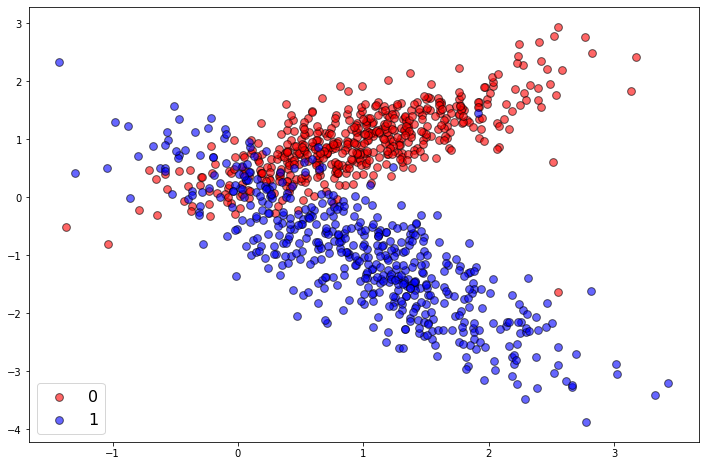

In [5]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(X[:,0][np.where(y==0)], X[:,1][np.where(y==0)], s=60, c='red', label='0', alpha=0.6, edgecolors='black')
plt.scatter(X[:,0][np.where(y==1)], X[:,1][np.where(y==1)], s=60, c='blue', label='1', alpha=0.6, edgecolors='black')
plt.legend(fontsize=16);

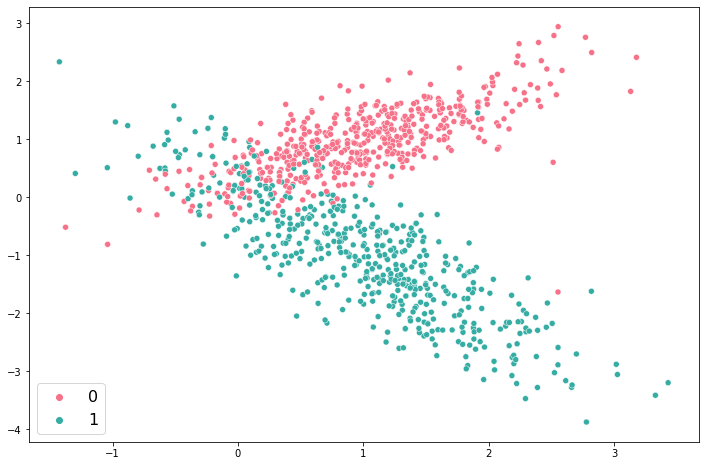

In [17]:
#alternativly use sns

fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='husl')

plt.legend(fontsize=16);

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [19]:
train_test_split?

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [41]:
clf = RandomForestClassifier()

forest = clf.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9272727272727272

In [42]:
#how score is calculated 
np.mean(clf.predict(X_test)==y_test)

0.9272727272727272

In [43]:
forest.score(X_train, y_train) # overfitting on training data

1.0

In [44]:
# basically same thing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_train_pred = clf.predict(X_train)
print('train accuracy:', accuracy_score(y_train, y_train_pred))

train accuracy: 1.0


In [80]:
# from sklearn.model_selection import GridSearchCV
# 
# param_grid = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 4, 6],
#     'min_samples_leaf': [1, 2, 3]
# }
# 
# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
# 
# grid_search.fit(X_train, y_train)
# 
# print('Best parameters:', grid_search.best_params_)
# print('Best cross-validated score:', grid_search.best_score_)
# 
# y_test_pred = grid_search.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print('Testing accuracy:', test_accuracy)

## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [45]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

In [46]:
Z

array([[0.32, 0.29, 0.29, ..., 0.99, 0.99, 0.99],
       [0.32, 0.29, 0.29, ..., 0.99, 0.99, 0.99],
       [0.32, 0.29, 0.29, ..., 0.99, 0.99, 0.99],
       ...,
       [0.91, 0.9 , 0.9 , ..., 0.03, 0.03, 0.03],
       [0.91, 0.9 , 0.9 , ..., 0.03, 0.03, 0.03],
       [0.91, 0.9 , 0.9 , ..., 0.03, 0.03, 0.03]])

Then we can plot the boundary using the 'contourf' function of matplotlib.

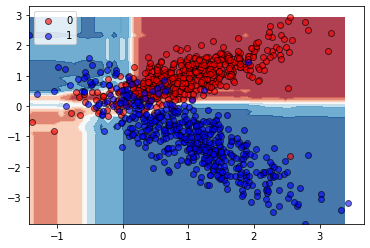

In [47]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

In [ ]:
# shows probabilities we want to predict 
# only works for small dimensions (best 2)
# we want more white regions - 50/50 for red/blue
# red = 100% red - the lighter it becomes the less ... same for blue

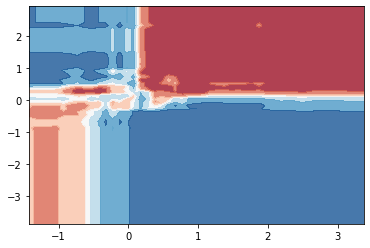

In [49]:
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm);

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

- hyper parameters: parameters that we can choose/ select, can not be trained 
- bootstrapping: training on different subsets to create non dependant models

<img src="figures/Screenshot.png" width="600"/>

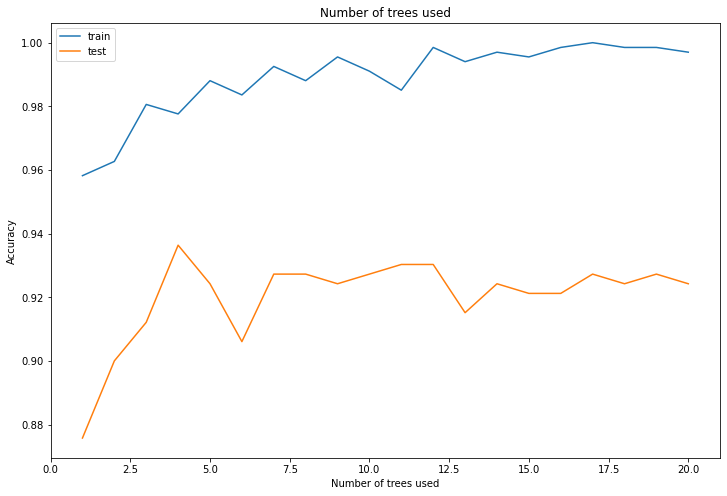

In [55]:
test_acc = []
train_acc = []

for i in range(1,21):
    clf = RandomForestClassifier(n_estimators=i)
    forest = clf.fit(X_train, y_train)
    score_test = forest.score(X_train, y_train)
    train_acc.append(score_test)
    score_train = forest.score(X_test, y_test)
    test_acc.append(score_train)

# test_acc
# train_acc

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(list(range(1,21)),train_acc, label='train')
plt.plot(list(range(1,21)),test_acc, label='test')
ax.set(xlim=(0, 21),
       xlabel='Number of trees used', ylabel='Accuracy',
       title='Number of trees used');
plt.legend();

<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

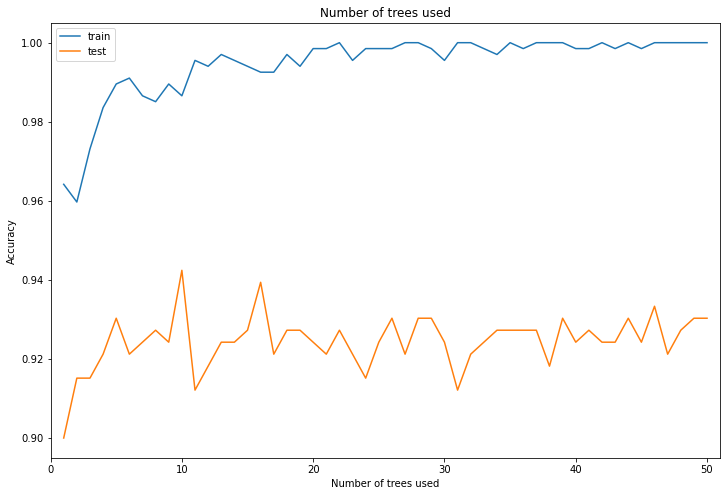

In [56]:
test_acc = []
train_acc = []

for i in range(1,51):
    clf = RandomForestClassifier(n_estimators=i)
    forest = clf.fit(X_train, y_train)
    score_test = forest.score(X_train, y_train)
    train_acc.append(score_test)
    score_train = forest.score(X_test, y_test)
    test_acc.append(score_train)

# test_acc
# train_acc

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(list(range(1,51)),train_acc, label='train')
plt.plot(list(range(1,51)),test_acc, label='test')
ax.set(xlim=(0, 51),
       xlabel='Number of trees used', ylabel='Accuracy',
       title='Number of trees used');
plt.legend();

<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

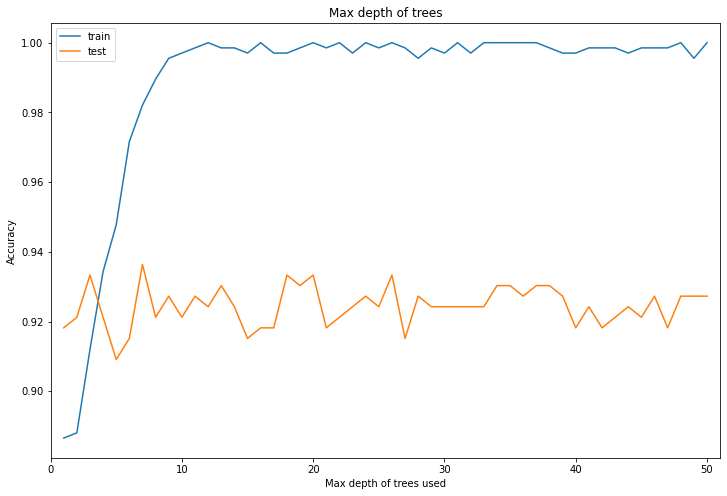

In [59]:
test_acc = []
train_acc = []

for i in range(1,51):
    clf = RandomForestClassifier(n_estimators=30, max_depth=i)
    forest = clf.fit(X_train, y_train)
    score_test = forest.score(X_train, y_train)
    train_acc.append(score_test)
    score_train = forest.score(X_test, y_test)
    test_acc.append(score_train)

# test_acc
# train_acc

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(list(range(1,51)),train_acc, label='train')
plt.plot(list(range(1,51)),test_acc, label='test')
ax.set(xlim=(0, 51),
       xlabel='Max depth of trees used', ylabel='Accuracy',
       title='Max depth of trees');
plt.legend();

## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [60]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

In [61]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 


one hot encode?
- creates as many features as possible values 
- for Int. plan it would create two columnes from one 

In [62]:
churn_df_drop = churn_df.drop(columns=['State', 'International plan', 'Voice mail plan'])
churn_df_drop

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [63]:
# alternative with bool
churn_df_bool = churn_df.replace(['Yes','No'],[1,0]).drop(columns=['State'])
churn_df_bool

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

[0.03341704 0.00855419 0.08355146 0.01872839 0.02743614 0.13774876
 0.03501304 0.1279967  0.0659566  0.03033789 0.0679969  0.03754972
 0.03262794 0.03674963 0.04347024 0.05074861 0.04505814 0.11705862]


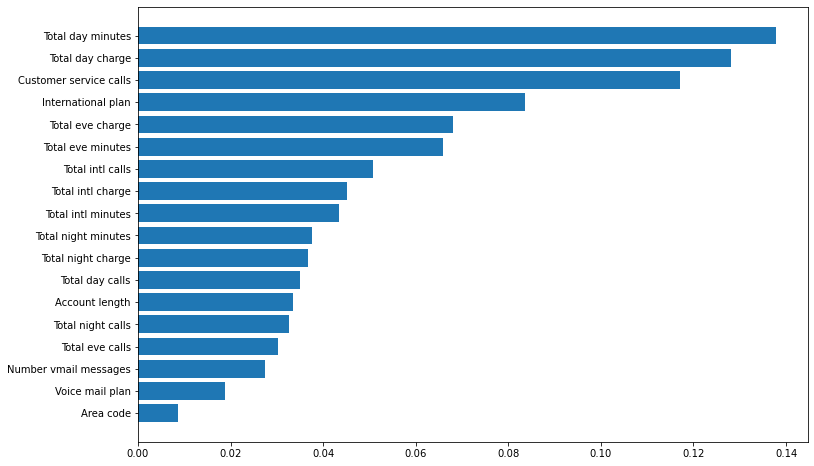

In [65]:
X_train, X_test, y_train, y_test = train_test_split(churn_df_bool, label, test_size=.33, random_state=42)

feature_names = churn_df_bool.columns.values
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

importances = forest.feature_importances_
print(importances)
#forest_importances = pd.Series(importances, index=feature_names)

sorted_idx = np.argsort(importances)
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(feature_names[sorted_idx], importances[sorted_idx]);


#plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])

<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [66]:
from sklearn.metrics import mean_squared_error
X,y = make_regression(n_samples=2000, n_features=10, n_informative=8, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=10)
clf.fit(X_train, y_train)

print(mean_squared_error(clf.predict(X_train), y_train))
print(mean_squared_error(clf.predict(X_test), y_test))

478.5515412173452
2454.7202012654116


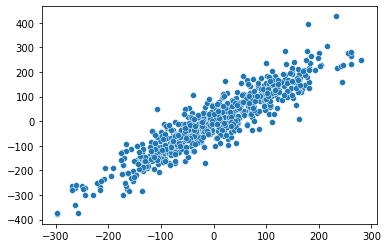

In [67]:
fig = sns.scatterplot(x = clf.predict(X_test), y=y_test)